   WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0         1.12         0.52       3.29       7.89          216.08   
1         2.85         0.49       4.22       5.03          206.18   
2         2.20         1.81       4.04       9.23           28.73   
3         1.80         0.50       1.62       7.68          276.77   
4         0.47         0.54       1.60       4.94          170.54   

   RelaxationTime  SleepTime  
0            0.75       3.45  
1            0.67       4.88  
2            0.35       3.61  
3            1.21       4.94  
4            0.95       5.50  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  20

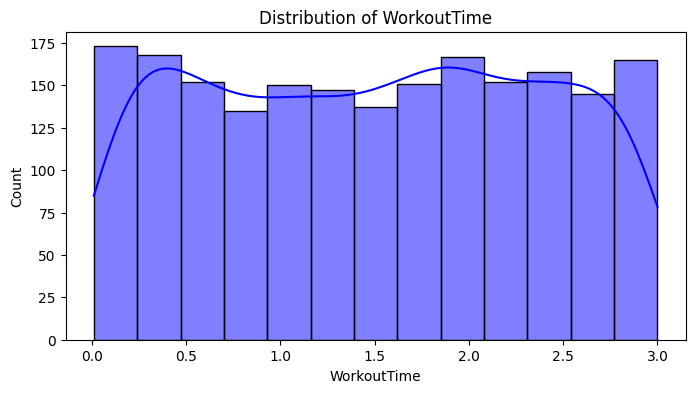

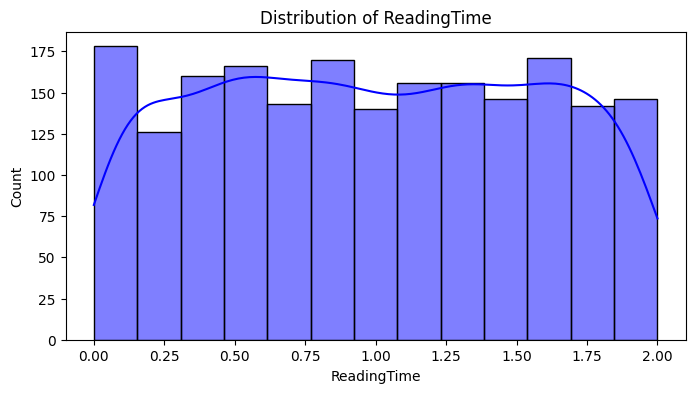

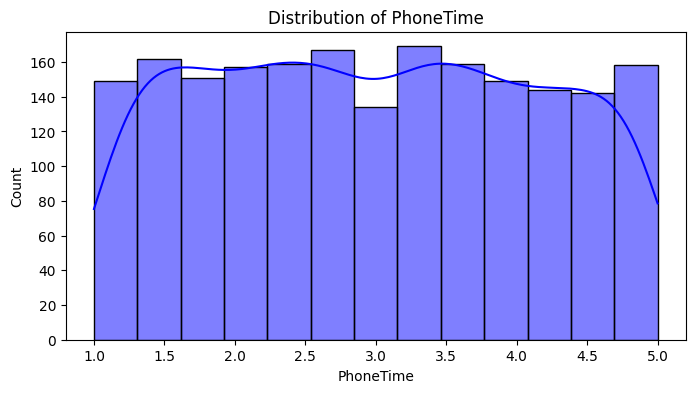

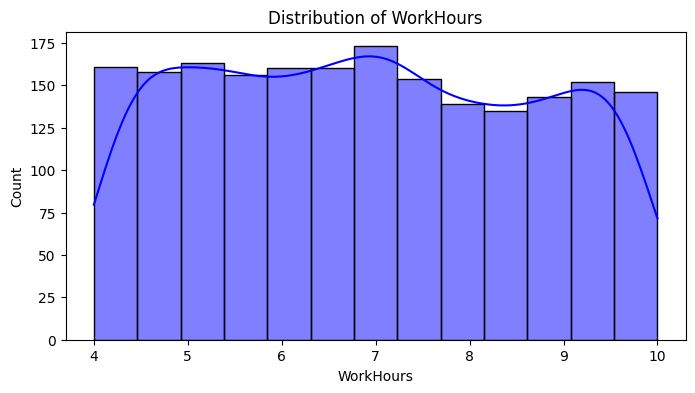

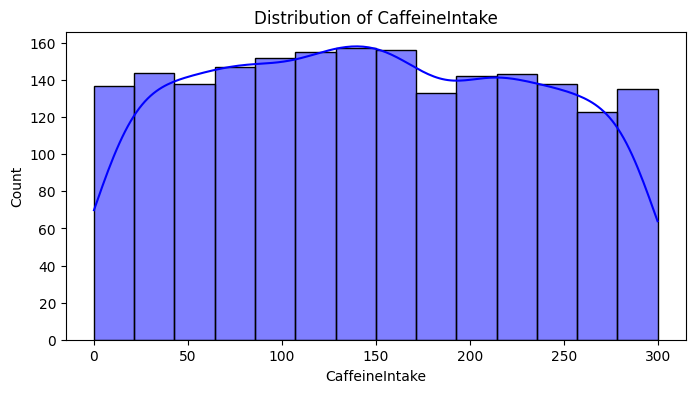

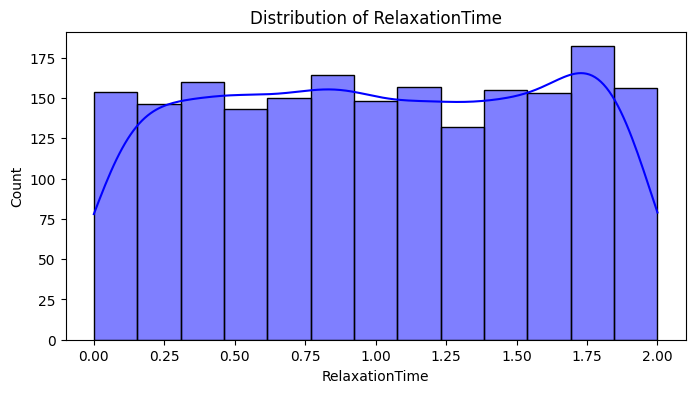

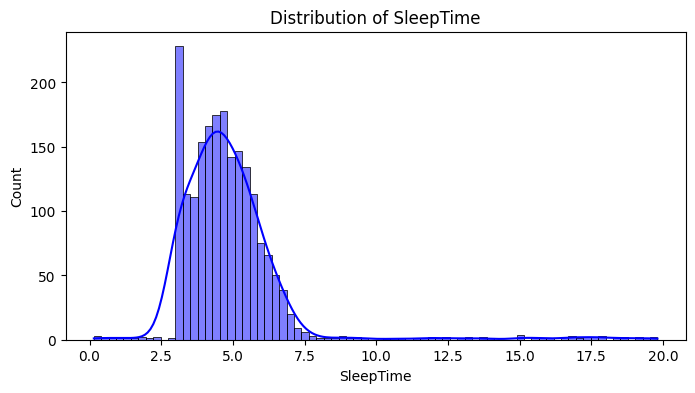

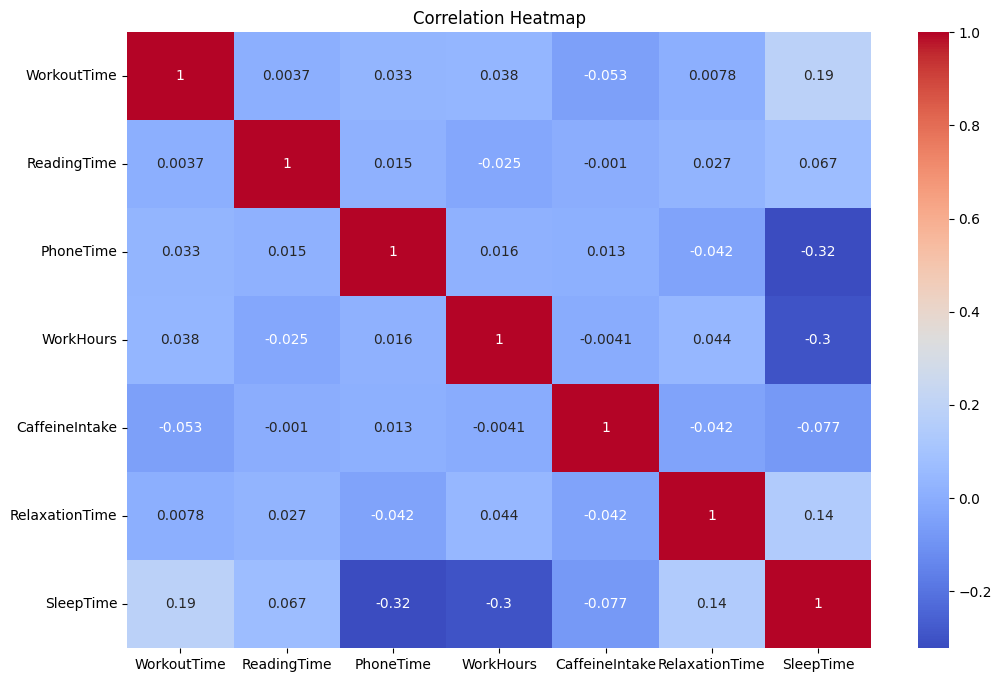

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('sleeptime_prediction_dataset.csv')  # update path accordingly

# First look at the data
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check for duplicates
print("\nDuplicate records:", df.duplicated().sum())

# Univariate Analysis
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot to explore feature relationships (optional if dataset is not too large)
# sns.pairplot(df)
# plt.show()

# Categorical Variables Analysis (if any)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, palette="viridis")
    plt.title(f'Count plot for {col}')
    plt.show()


Dataset Shape: (2000, 7)

First 5 rows:
   WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0         1.12         0.52       3.29       7.89          216.08   
1         2.85         0.49       4.22       5.03          206.18   
2         2.20         1.81       4.04       9.23           28.73   
3         1.80         0.50       1.62       7.68          276.77   
4         0.47         0.54       1.60       4.94          170.54   

   RelaxationTime  SleepTime  
0            0.75       3.45  
1            0.67       4.88  
2            0.35       3.61  
3            1.21       4.94  
4            0.95       5.50  

Data Types:
WorkoutTime       float64
ReadingTime       float64
PhoneTime         float64
WorkHours         float64
CaffeineIntake    float64
RelaxationTime    float64
SleepTime         float64
dtype: object

Summary Statistics:
       WorkoutTime  ReadingTime    PhoneTime    WorkHours  CaffeineIntake  \
count  2000.000000  2000.000000  2000.000000  2000.0

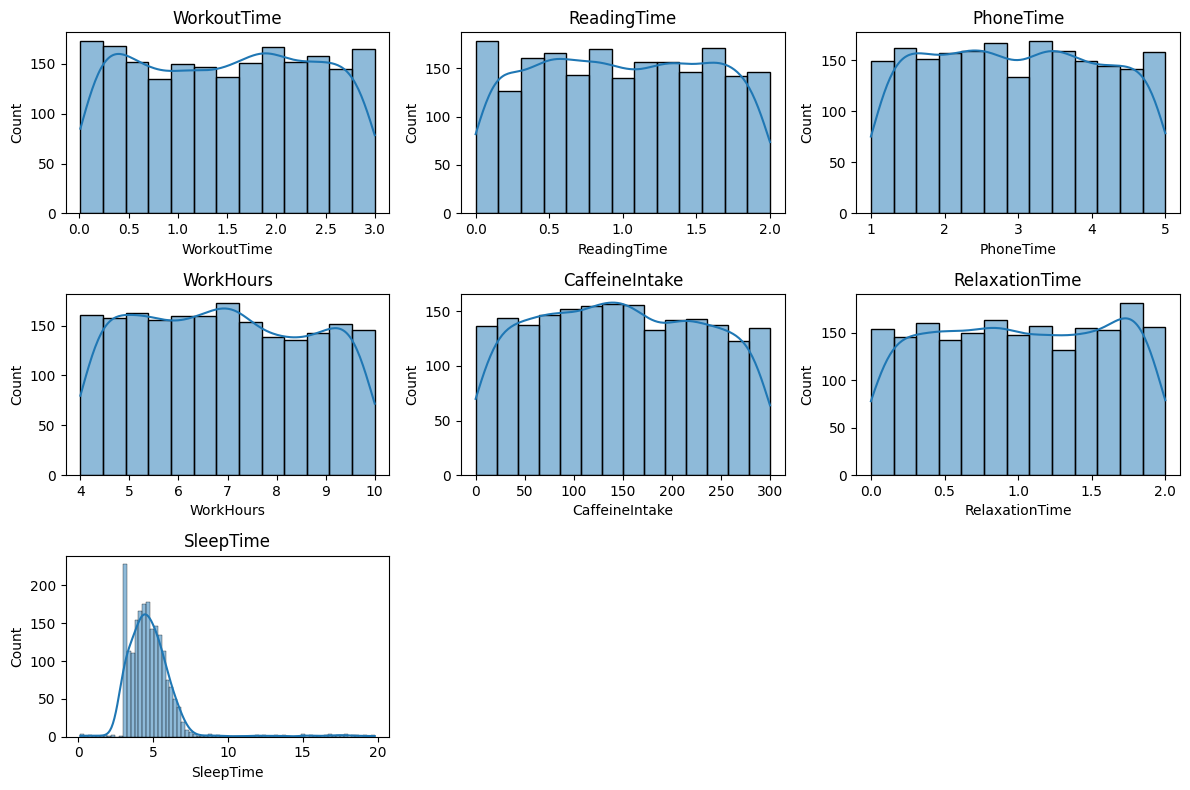

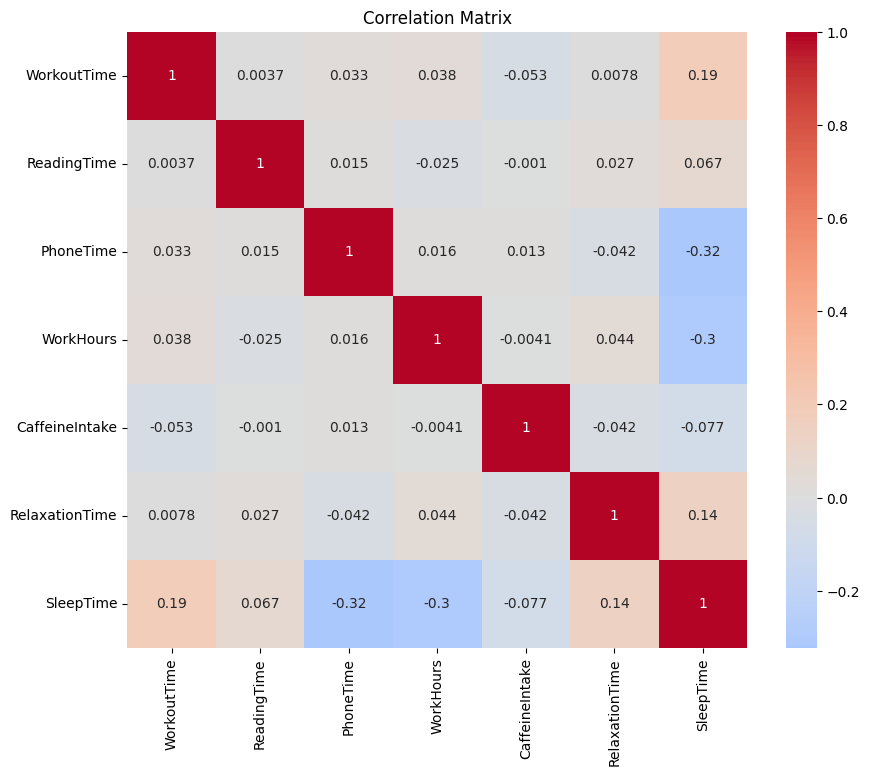

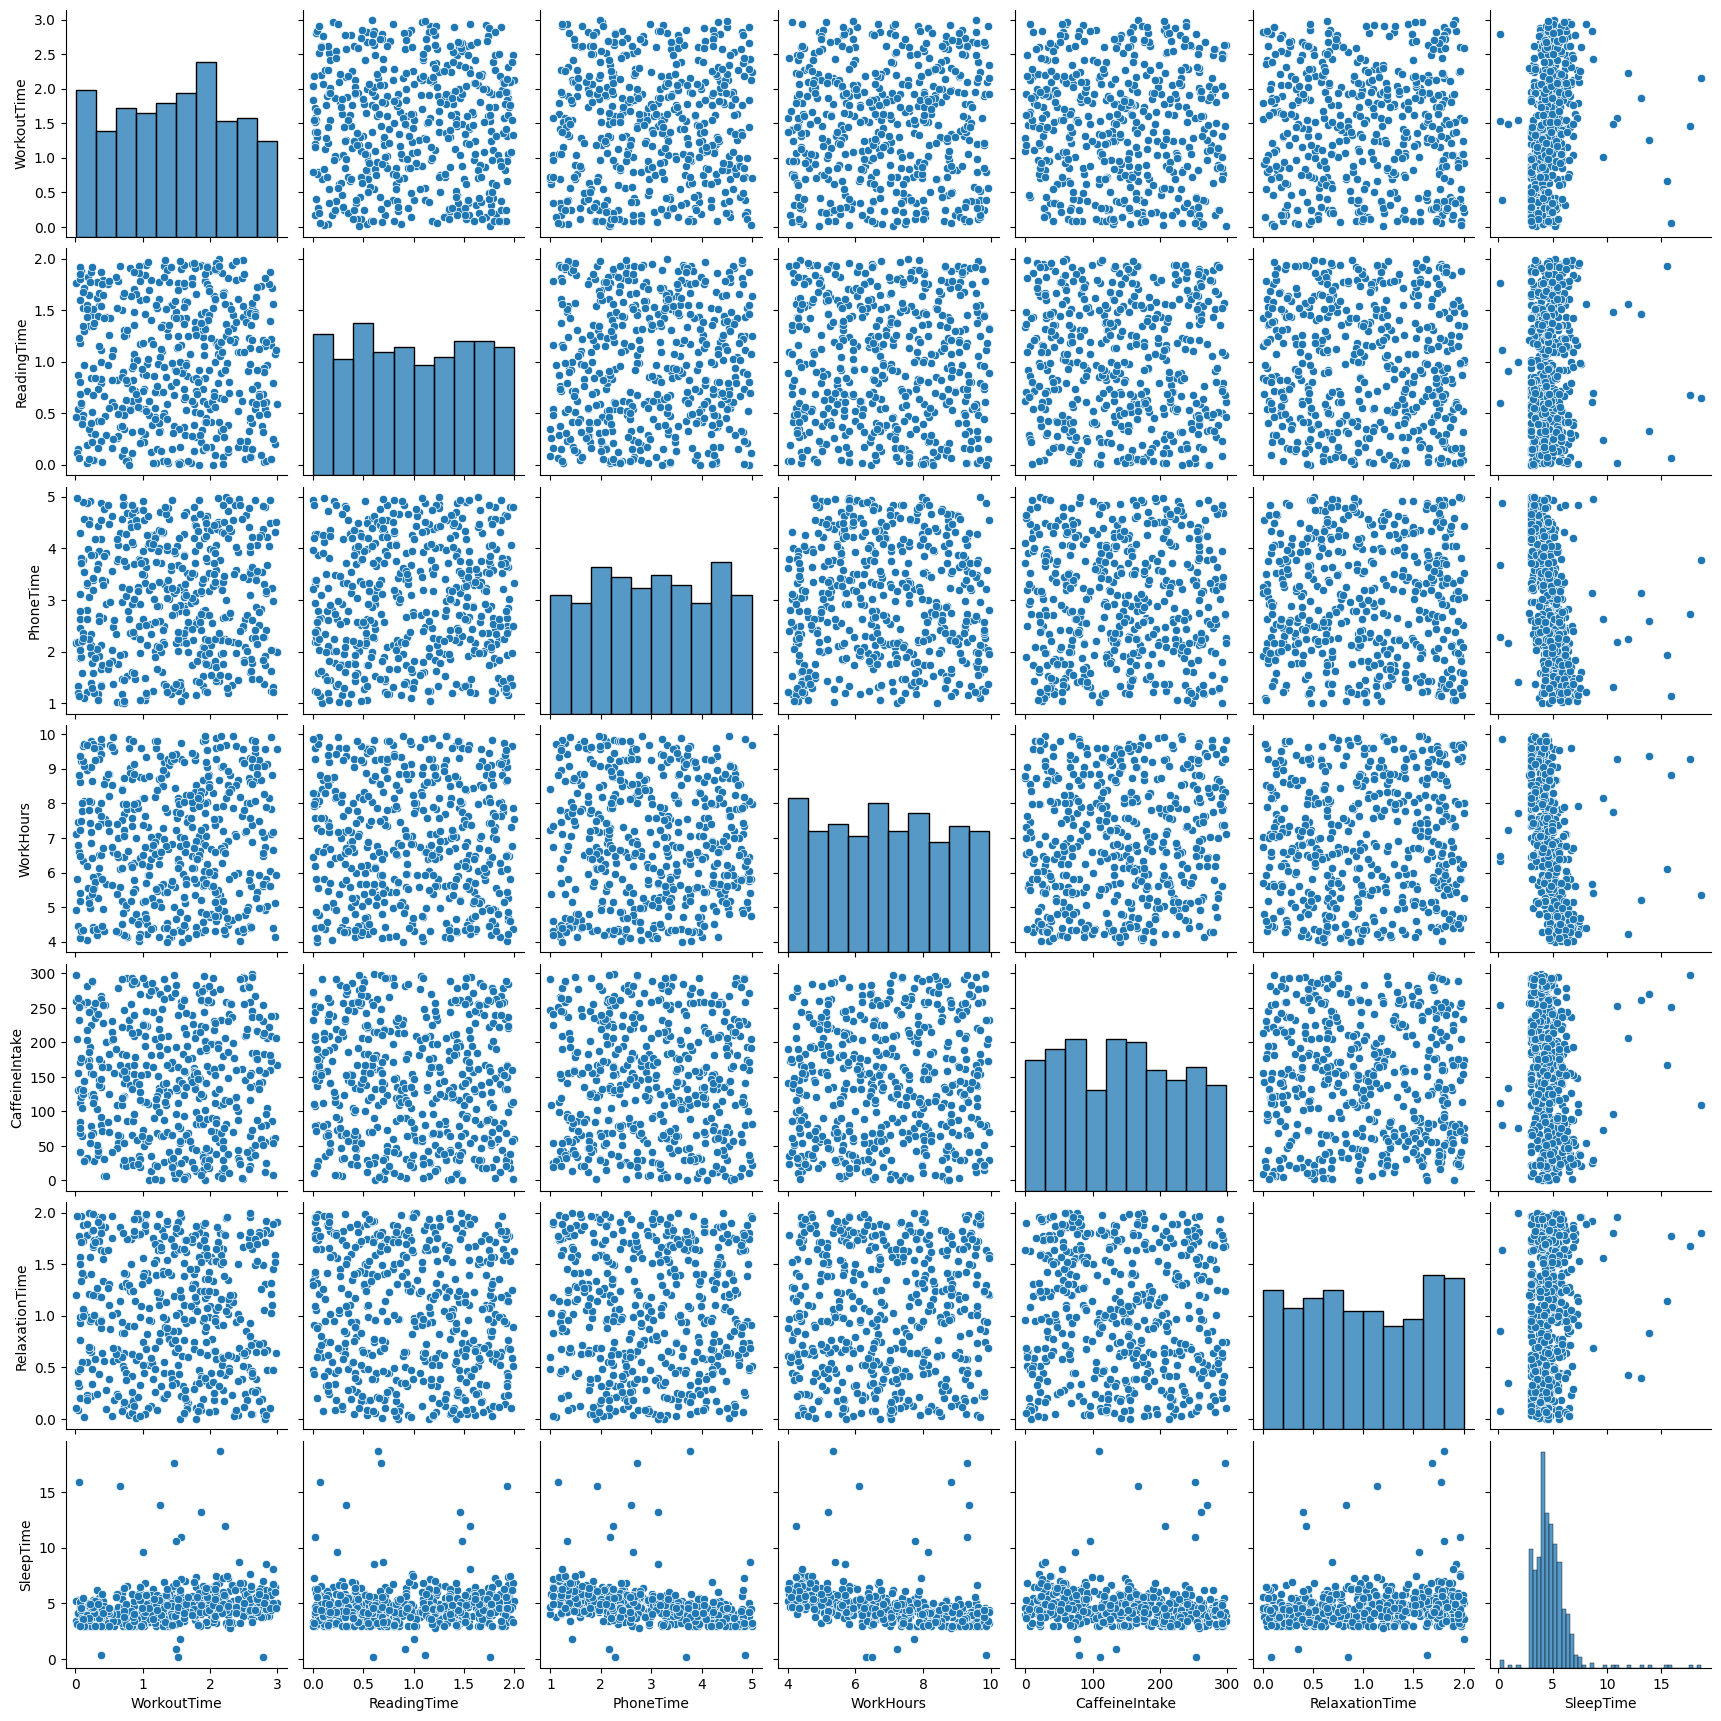

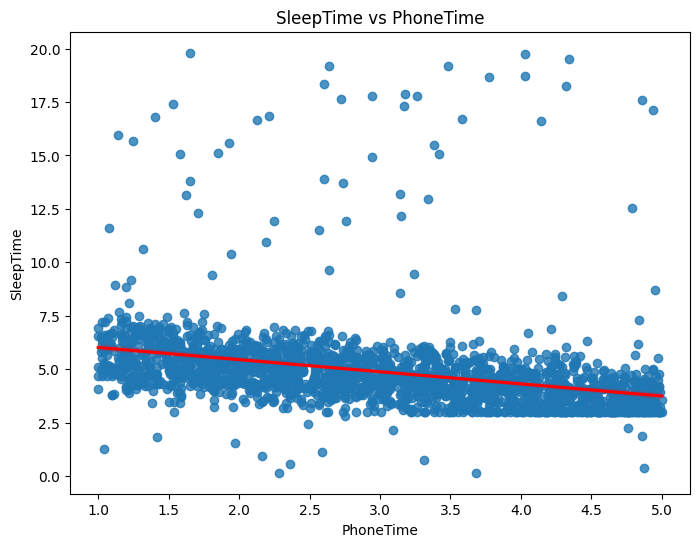


PhoneTime vs SleepTime:
Pearson r: -0.323
p-value: 0.0000


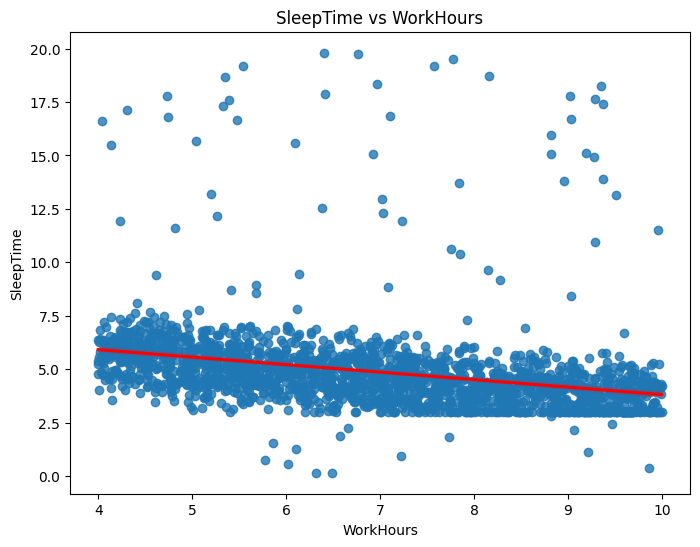


WorkHours vs SleepTime:
Pearson r: -0.298
p-value: 0.0000


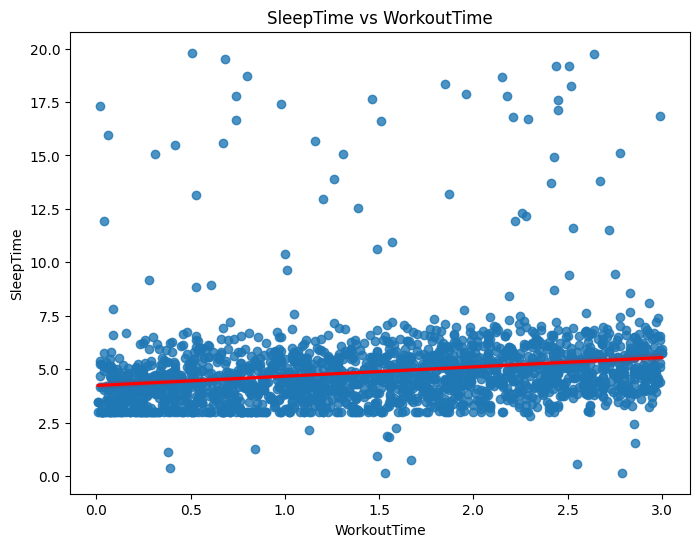


WorkoutTime vs SleepTime:
Pearson r: 0.188
p-value: 0.0000


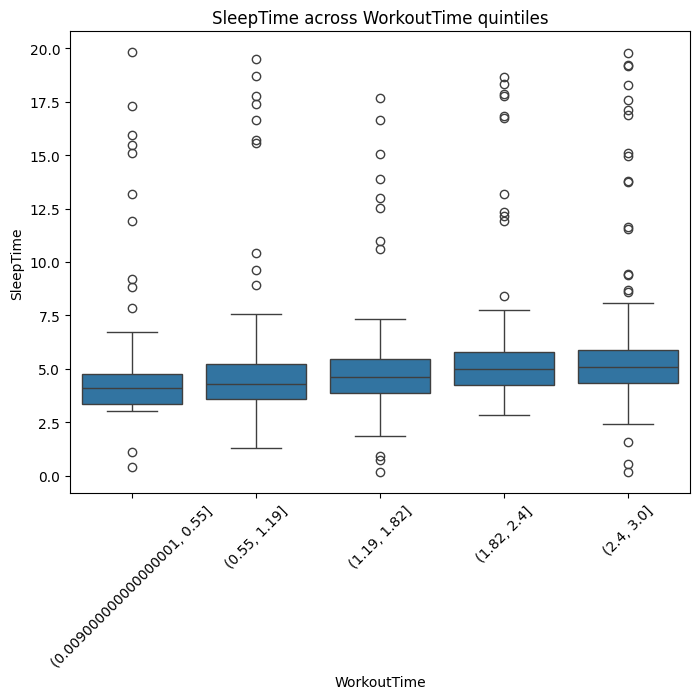

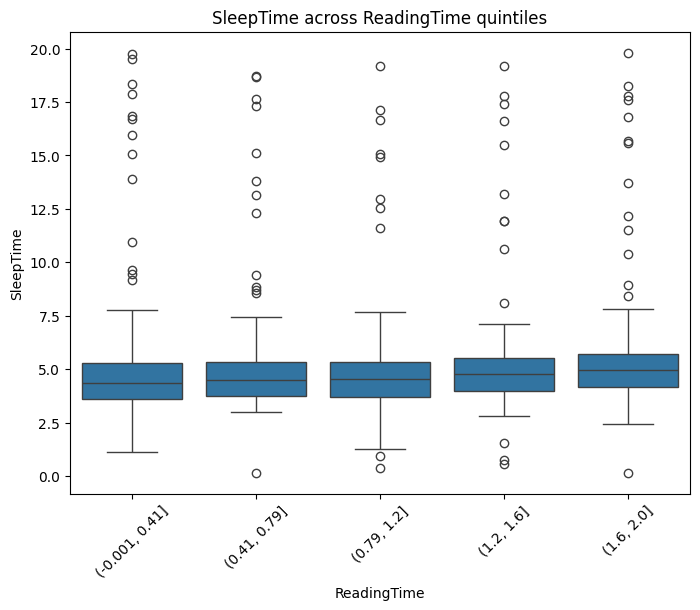

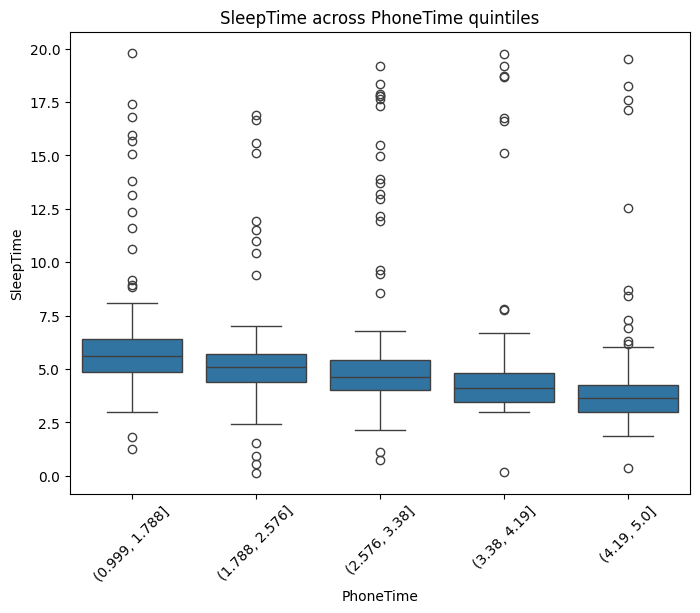

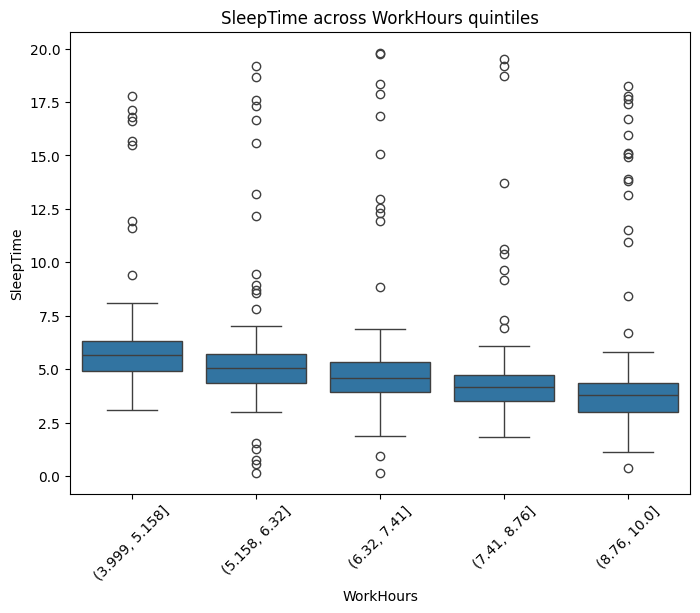

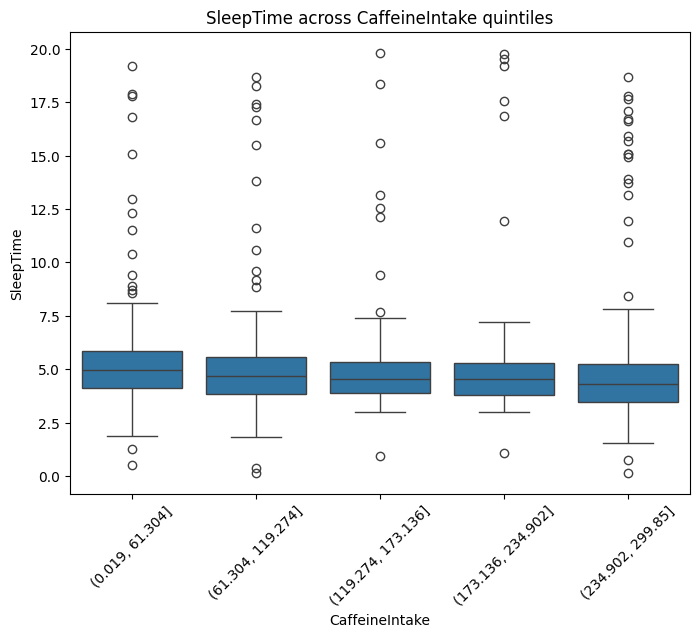

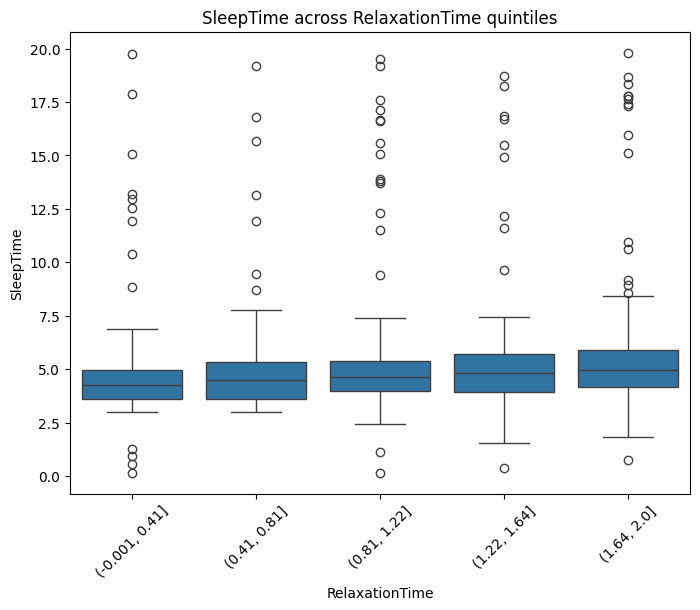

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
df = pd.read_csv('sleeptime_prediction_dataset.csv')

# 1. Basic Data Overview
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe())

# 2. Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# 3. Visualize Distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# 4. Correlation Analysis
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

# 5. Pairwise Relationships (sample for first 500 rows if dataset is large)
sns.pairplot(df.sample(min(500, len(df)) if len(df) > 500 else df))
plt.show()

# 6. Scatter Plots with Regression Lines for Top Correlations
top_features = corr_matrix['SleepTime'].abs().sort_values(ascending=False).index[1:4]
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df[feature], y=df['SleepTime'], line_kws={'color': 'red'})
    plt.title(f'SleepTime vs {feature}')
    plt.show()
    
    # Calculate Pearson correlation and p-value
    r, p = stats.pearsonr(df[feature], df['SleepTime'])
    print(f"\n{feature} vs SleepTime:")
    print(f"Pearson r: {r:.3f}")
    print(f"p-value: {p:.4f}")

# 7. Boxplots for Potential Non-linear Relationships
for feature in df.columns[:-1]:  # exclude target variable
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=pd.qcut(df[feature], q=5), y=df['SleepTime'])
    plt.title(f'SleepTime across {feature} quintiles')
    plt.xticks(rotation=45)
    plt.show()


Model Performance Comparison:
                                MAE      RMSE        R2
Random Forest              0.571544  1.358751  0.318159
Linear Regression          0.436526  1.261468  0.412299
Support Vector Regression  0.322147  1.271714  0.402714


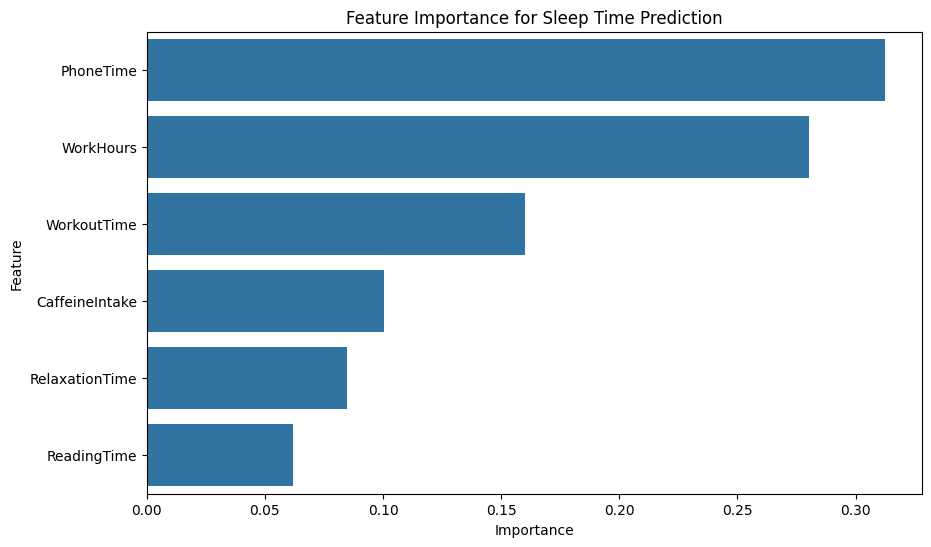

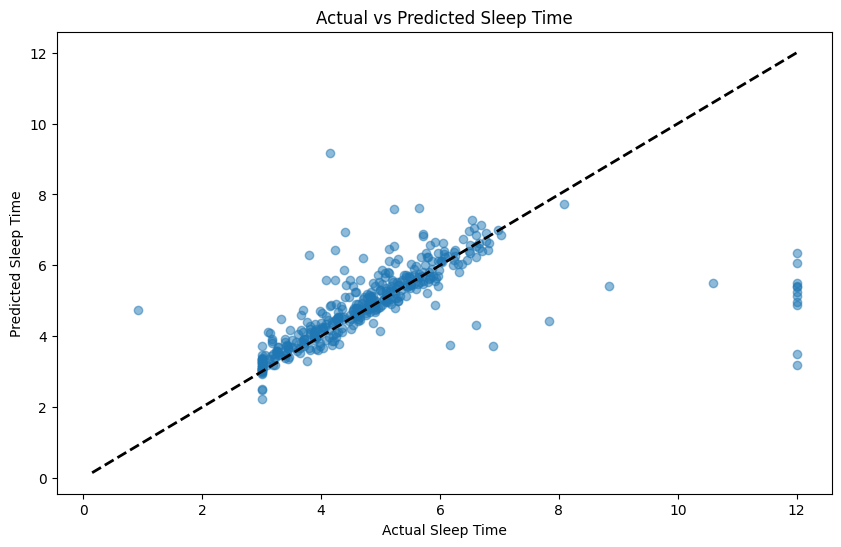

['sleep_time_scaler.pkl']

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Load data
df = pd.read_csv('sleeptime_prediction_dataset.csv')

# 1. Data Preprocessing
# Handle outliers in SleepTime (cap at 12 hours based on domain knowledge)
df['SleepTime'] = np.where(df['SleepTime'] > 12, 12, df['SleepTime'])

# Feature selection
X = df.drop('SleepTime', axis=1)
y = df['SleepTime']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Model Training
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR()
}

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
rf.fit(X_train_scaled, y_train)
best_rf = rf.best_estimator_

# Update models with tuned Random Forest
models['Random Forest'] = best_rf

# Train and evaluate all models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

# 3. Results Analysis
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

# Feature importance from Random Forest
feature_importance = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Sleep Time Prediction')
plt.show()

# 4. Prediction Visualization
best_model = best_rf  # or choose another model from results
y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sleep Time')
plt.ylabel('Predicted Sleep Time')
plt.title('Actual vs Predicted Sleep Time')
plt.show()

# 5. Save the best model
import joblib
joblib.dump(best_model, 'sleep_time_predictor.pkl')
joblib.dump(scaler, 'sleep_time_scaler.pkl')